In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import CME - Quandl e Dado Bruto

In [2]:
import quandl


In [3]:
quandl.ApiConfig.api_key = "MINHACHAVE"

In [4]:
WTI=quandl.get("CHRIS/CME_CL1")


In [5]:
#Salvei no meu computador para não mudar a base de dados
WTI.to_csv('CHRIS_CME_CL1_2019_06_03.csv')


In [33]:
WTI=pd.read_csv('CHRIS_CME_CL1_2019_06_03.csv', index_col=0)
WTI.index=pd.to_datetime(WTI.index)

In [5]:
WTI.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1983-03-30,29.01,29.56,29.01,29.40,NaN,29.40,949.0,470.0
1983-03-31,29.40,29.60,29.25,29.29,NaN,29.29,521.0,523.0
1983-04-04,29.30,29.70,29.29,29.44,NaN,29.44,156.0,583.0
1983-04-05,29.50,29.80,29.50,29.71,NaN,29.71,175.0,623.0
1983-04-06,29.90,29.92,29.65,29.90,NaN,29.90,392.0,640.0


[]

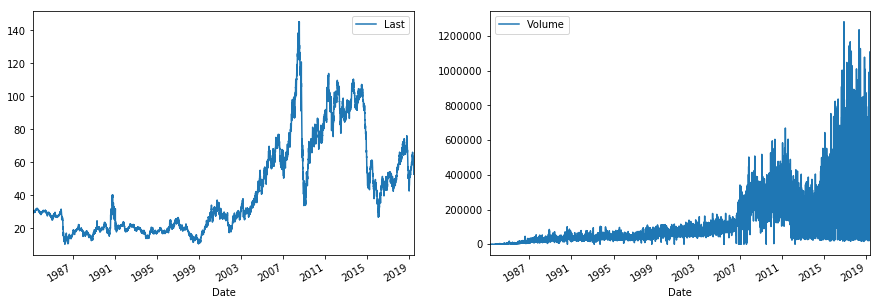

In [12]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(15,5))
WTI.Last.plot(ax=ax1)
WTI.Volume.plot(ax=ax2)
ax1.legend()
ax2.legend()

plt.plot()

[]

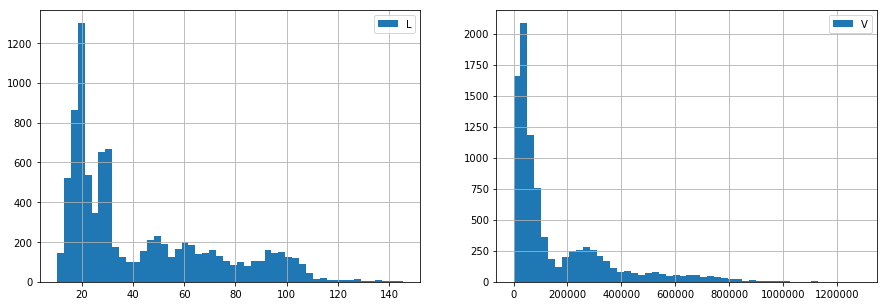

In [27]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(15,5))
WTI.Last.hist(bins=50,ax=ax1)
WTI.Volume.hist(bins=50, ax=ax2)
ax1.legend('L')
ax2.legend('V')
plt.plot()

[]

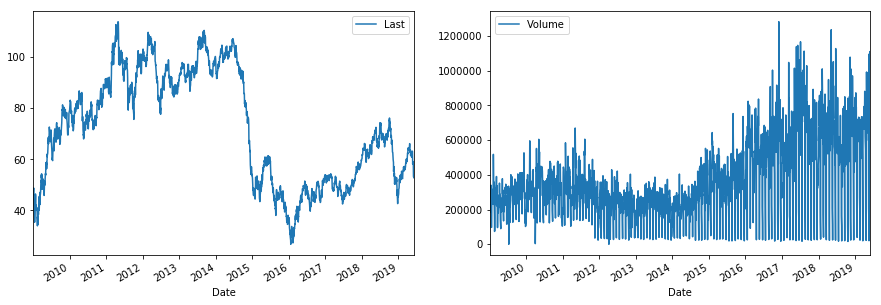

In [22]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(15,5))
WTI.Last['2009':].plot(ax=ax1)
WTI.Volume['2009':].plot(ax=ax2)
ax1.legend()
ax2.legend()

plt.plot()

[]

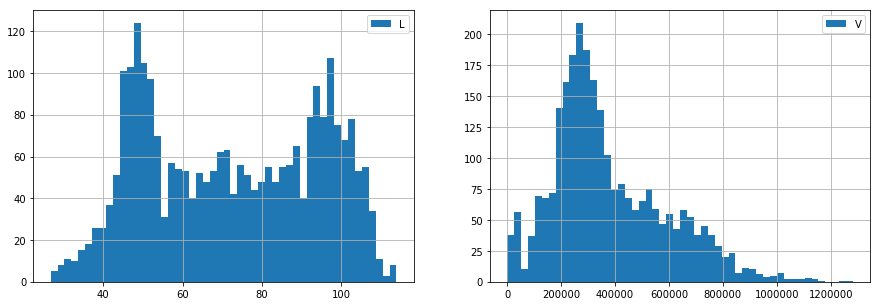

In [26]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(15,5))
WTI.Last['2009':].hist(bins=50,ax=ax1)
WTI.Volume['2009':].hist(bins=50, ax=ax2)
ax1.legend('L')
ax2.legend('V')
plt.plot()

In [40]:
WTI['2009':].

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,d10_Last_pct,d14_SMA,...,d200_SMA,d01_Volume_pct,d14_Volume_SMA,d01_Interest_SMA,d01_Interest_pct,d14_Interest_SMA,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,43.72,46.74,41.05,46.34,NaN,46.34,184679.0,286346.0,0.156765,40.462857,...,100.14255,0.039013,0.000775,187604.071429,0.063541,-0.023667,0,0,0,1
2009-01-05,47.04,49.28,45.56,48.81,NaN,48.81,258762.0,281902.0,0.347598,40.643571,...,99.87160,0.053302,0.007113,199252.214286,0.062089,-0.015800,0,0,0,0
2009-01-06,48.40,50.47,47.60,48.58,NaN,48.58,331307.0,249345.0,0.434308,40.934286,...,99.61020,-0.004712,0.009509,209409.071429,0.050975,-0.008262,1,0,0,0
2009-01-07,48.41,49.09,42.41,42.63,NaN,42.63,306262.0,238637.0,0.068153,40.865000,...,99.31725,-0.122478,0.002221,221208.857143,0.056348,0.000614,0,1,0,0
2009-01-08,42.63,43.63,40.54,41.70,NaN,41.70,312485.0,207749.0,0.069779,40.982143,...,98.99625,-0.021816,0.006462,232018.428571,0.048866,0.009812,0,0,1,0


# Criando  Target e Features  - CME-Quandl

In [28]:
import talib

In [45]:
#Target
#10d_close_future_pct

WTI['d10_Last_future']= WTI.Last.shift(-10)

WTI['d10_Last_future_pct']= WTI['d10_Last_future'].pct_change(10)



In [57]:
#Features


# d10_close_pct
WTI['d10_Last_pct']= WTI.Last.pct_change(10)



# d14_SMA
# d14_RSI
# d200_SMA
# d200_RSI

WTI['d14_SMA']=talib.SMA(WTI.Last.values, timeperiod=14)
WTI['d14_RSI']=talib.RSI(WTI.Last.values, timeperiod=14)


WTI['d200_RSI']=talib.RSI(WTI.Last.values, timeperiod=200)
WTI['d200_SMA']=talib.SMA(WTI.Last.values, timeperiod=200)



#d01_Volume_Change
#d14_Volume_SMA

WTI['d01_Volume_pct']=WTI.Last.pct_change()
WTI['d14_Volume_SMA']=talib.SMA(WTI.d01_Volume_pct.values, timeperiod=14)




#d01_Interest_Change - necessario suavizar
#d14_Interest_SMA

WTI['Previous Day Open Interest']=WTI['Previous Day Open Interest'].interpolate()
WTI['d01_Interest_SMA']=talib.SMA(WTI['Previous Day Open Interest'].values, timeperiod=14)
#WTI['d01_Interest_SMA']=talib.SMA(WTI['Previous Day Open Interest'][~np.isnan(WTI['Previous Day Open Interest'])], timeperiod=14)
WTI['d01_Interest_pct']=WTI['d01_Interest_SMA'].pct_change()
WTI['d14_Interest_SMA']=talib.SMA(WTI['d01_Interest_pct'].values, timeperiod=14)


                                                          #
#weekday_1_2_3_4


day_of_week=pd.get_dummies(WTI.index.dayofweek, prefix='weekday', drop_first=True)

#same index
day_of_week.index=WTI.index

#concat

WTI=pd.concat([WTI,day_of_week], axis=1)





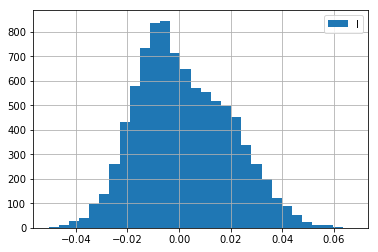

In [63]:
#WTI['d01_Interest_SMA'].plot()
WTI['d14_Interest_SMA'].hist(bins=30)
plt.legend("I_SMA")


In [64]:
feature_names=['d10_Last_pct','d14_SMA', 'd14_RSI','d200_RSI','d200_SMA', 'd01_Volume_pct', 'd14_Volume_SMA','d01_Interest_pct','d14_Interest_SMA', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4']
features=WTI[feature_names]
targets=WTI['d10_Last_future_pct']

In [50]:
len(feature_names)

13

In [10]:
import seaborn as sns

In [65]:
#sem os dias da semana

features_target_df= WTI[['d10_Last_future_pct']+ feature_names]

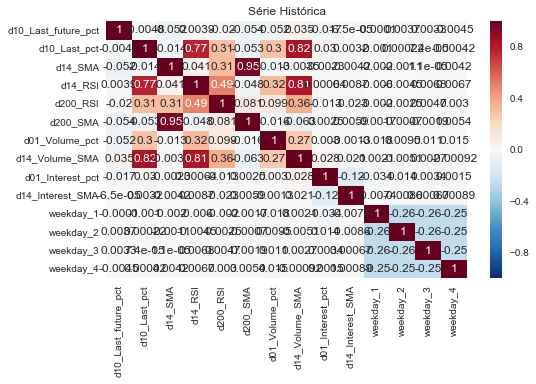

In [12]:
corr=features_target_df.corr()

sns.heatmap(corr, annot=True)
plt.yticks()
plt.title('Série Histórica')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



0.0038574326289209132

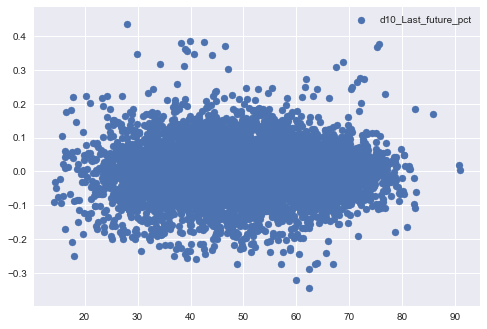

In [65]:
plt.scatter(features_target_df['d14_RSI'],features_target_df['d10_Last_future_pct'])

plt.legend()

features_target_df['d14_RSI'].corr(features_target_df['d10_Last_future_pct'])

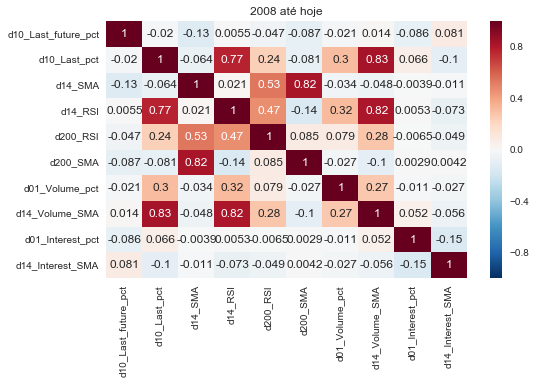

In [51]:
# 2009 até hoje


corr_2009=features_target_df.loc['2009':].corr()

sns.heatmap(corr_2009, annot=True)
plt.yticks()
plt.xticks(rotation=90)
plt.title('2008 até hoje')
plt.tight_layout()
plt.show()


0.05133432572733724

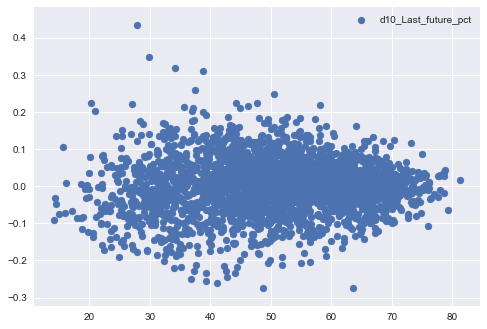

In [211]:
plt.scatter(features_target_df['d14_RSI']['2008':],features_target_df['d10_Last_future_pct']['2008':])

plt.legend()

features_target_df['d14_RSI']['2008':].corr(features_target_df['d10_Last_future_pct']['2008':])

# Model decision tree 75 and  and Cross Validation interator

In [66]:
from sklearn.model_selection import TimeSeriesSplit

In [14]:
cv=TimeSeriesSplit(n_splits=10)

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
features_target_df.shape

(9090, 14)

In [17]:
features_target_df.columns

Index(['d10_Last_future_pct', 'd10_Last_pct', 'd14_SMA', 'd14_RSI', 'd200_RSI',
       'd200_SMA', 'd01_Volume_pct', 'd14_Volume_SMA', 'd01_Interest_pct',
       'd14_Interest_SMA', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4'],
      dtype='object')

In [67]:
drop_feat_targ=features_target_df.dropna()

In [91]:
#for tr, tt in cv.split(X,y):
#    #Fit the model
#    model.fit(X[tr],y[tr])
#    #Generate de Prediction
#    prediction=model.preditct(X[tt])
#    results.append((prediction,tt))
   
#decision_tree.fit(X,y)

IndentationError: unexpected indent (<ipython-input-91-85bfed83bda9>, line 7)

In [68]:
X=drop_feat_targ.iloc[:,1 :drop_feat_targ.shape[1]].values
y=drop_feat_targ.iloc[:,0].values

In [32]:
y.shape

(8880,)

In [20]:
teste=np.zeros((10,3))
treino=np.zeros((10,3))

for ii,(tr, tt) in enumerate(cv.split(X,y)):
    j=0
    for d in [3,5,10]:
        
        decision_tree=DecisionTreeRegressor(max_depth=d)
        #Fit the model
        decision_tree.fit(X[tr],y[tr])
        decision_tree.score
        #Score
        teste[ii,j]=decision_tree.score(X[tt],y[tt])
        treino[ii,j]=decision_tree.score(X[tr],y[tr])
        j=j+1
        
        
df_teste=pd.DataFrame(teste)
df_treino=pd.DataFrame(treino)
        

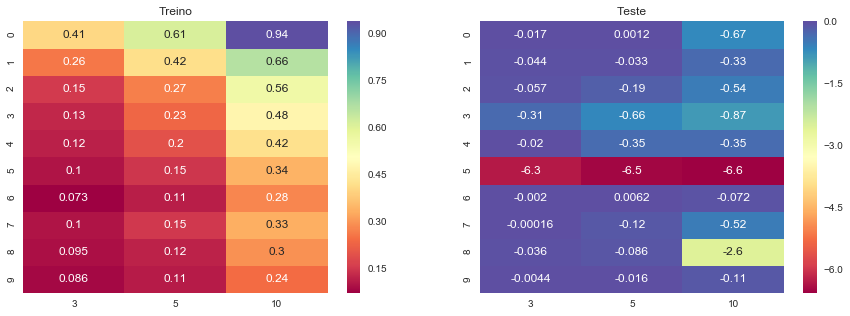

In [21]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))

sns.heatmap(df_treino, annot=True, cmap="Spectral", ax=ax1, vmax=max(df_treino.max()), vmin=min(df_treino.min()))
ax1.set_title('Treino')
ax1.set_xticklabels([3,5,10])

sns.heatmap(df_teste, annot=True, cmap="Spectral", ax=ax2, vmax=int(max(df_teste.max())), vmin=min(df_teste.min()))
ax2.set_title('Teste')
ax2.set_xticklabels([3,5,10])




In [22]:
df_teste.iloc[:,0].sum(), df_teste.iloc[:,1].sum(), df_teste.iloc[:,2].sum()

(-6.797400532523074, -7.962633943562301, -12.589069296081664)

# Model decision tree 2009 and  and Cross Validation interator

In [69]:
X2009=drop_feat_targ.loc['2009':,feature_names].values
y2009=drop_feat_targ.loc['2009':,'d10_Last_future_pct'].values

In [34]:
 X2009.shape

(2614, 13)

In [46]:
cv=TimeSeriesSplit(n_splits=10)

teste2009=np.zeros((10,3))
treino2009=np.zeros((10,3))

for ii,(tr, tt) in enumerate(cv.split(X2009,y2009)):
    j=0
    for d in [3,5,10]:
        
        decision_tree=DecisionTreeRegressor(max_depth=d)
        #Fit the model
        decision_tree.fit(X2009[tr],y2009[tr])
    
        #Score
        teste2009[ii,j]=decision_tree.score(X2009[tt],y2009[tt])
        treino2009[ii,j]=decision_tree.score(X2009[tr],y2009[tr])
        j=j+1
        
        
df_teste2009=pd.DataFrame(teste2009)
df_treino2009=pd.DataFrame(treino2009)
        

In [47]:
df_teste2009

,0,1,2
0,-0.309841,-3.024839,-2.919998
1,-1.439685,-2.371688,-2.064057
2,-0.151279,-1.206402,-5.026595
3,-0.182696,-1.482449,-1.824280
4,-0.123211,-0.040434,-1.098980
5,-3.219676,-3.663853,-6.580482
6,-1.223033,-1.721570,-3.476847
7,-0.031651,0.158471,-1.122028
8,-0.342541,-1.078904,-1.239433
9,-0.077167,-0.135379,-0.854910


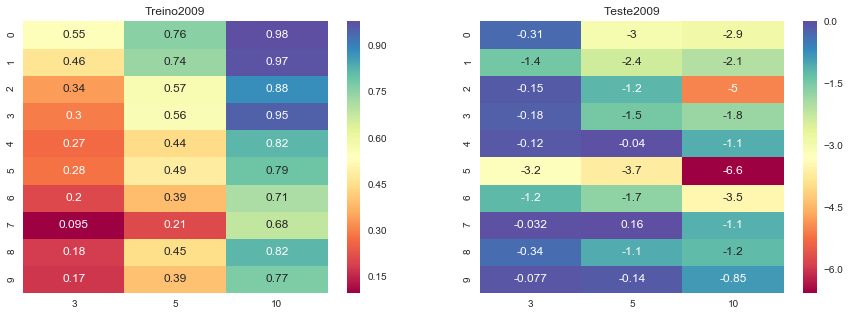

In [48]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))

sns.heatmap(df_treino2009, annot=True, cmap="Spectral", ax=ax1, vmax=max(df_treino2009.max()), vmin=min(df_treino2009.min()))
ax1.set_title('Treino2009')
ax1.set_xticklabels([3,5,10])

sns.heatmap(df_teste2009, annot=True, cmap="Spectral", ax=ax2, vmax=int(max(df_teste2009.max())), vmin=min(df_teste2009.min()))
ax2.set_title('Teste2009')
ax2.set_xticklabels([3,5,10])




In [49]:
df_teste2009.iloc[:,0].sum(), df_teste2009.iloc[:,1].sum(), df_teste2009.iloc[:,2].sum()

(-7.100777721466382, -14.56704637233535, -26.207609820274502)

# RandomForest  com outra forma de Split

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.model_selection import ParameterGrid

In [72]:
# Create a train and test set

train_size=int(0.8*X2009.shape[0])

train_features=X2009[:train_size]
train_targets=y2009[:train_size]

test_features=X2009[train_size:]
test_targets=y2009[train_size:]

In [73]:
start=drop_feat_targ.index.get_loc('2009-01-02')
stop=start+train_size

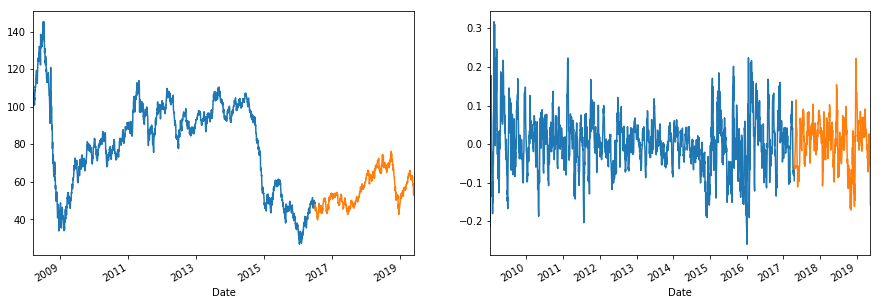

In [86]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))

WTI.Last.iloc[start:stop].plot(ax=ax1)

WTI.Last.iloc[stop:].plot(ax=ax1)

drop_feat_targ['d10_Last_future_pct'].iloc[start:stop].plot(ax=ax2)
drop_feat_targ['d10_Last_future_pct'].iloc[stop:].plot(ax=ax2)



plt.show()


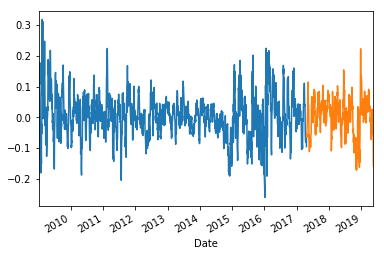

In [84]:
drop_feat_targ['d10_Last_future_pct'].iloc[start:stop].plot()
drop_feat_targ['d10_Last_future_pct'].iloc[stop:].plot()

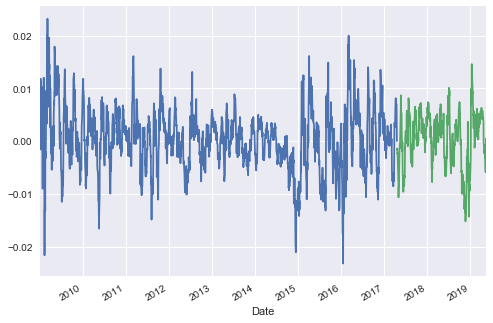

In [227]:
drop_feat_targ['d14_Volume_SMA'].iloc[start:stop].plot()
drop_feat_targ['d14_Volume_SMA'].iloc[stop:].plot()

In [70]:
#DecisionTree max_depth=3

for d in [3,5,10]:
    decision_tree=DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features,train_targets)
    print(d,decision_tree.score(train_features,train_targets),decision_tree.score(test_features,test_targets))      
    



3 0.1854005442247426 -0.07983119527627713
5 0.3826792409460297 -0.3382955684984113
10 0.763215968730691 -2.3097857885754522


In [72]:
rfr=RandomForestRegressor()

In [162]:
# Create a dictionary of hyperparameters and save scores  
grid={'n_estimators':np.arange(199,201, dtype=int),'max_depth':np.arange(3,6,dtype=int),
      'max_features':np.arange(10,13,dtype=int),'random_state':np.arange(40,50, dtype=int)}
test_scores=[]
train_scores=[]

In [159]:
np.arange(49,50, dtype=int)

array([49])

In [163]:
for g in ParameterGrid(grid):
    rfr.set_params(**g)  #is "unpacking the dictionary
    rfr.fit(train_features,train_targets)
    train_scores.append(rfr.score(train_features,train_targets))
    test_scores.append(rfr.score(test_features,test_targets))



    
best_idx=np.argmax(test_scores)
print(train_scores[best_idx], test_scores[best_idx], ParameterGrid(grid)[best_idx])
 
    


0.20781493328160405 0.006337422682819116 {'random_state': 45, 'n_estimators': 200, 'max_features': 10, 'max_depth': 3}


In [164]:
print ("0.036361982295715856 0.015301877288843468 {'random_state': 50, 'n_estimators': 5, 'max_features': 12, 'max_depth': 1}")
print("0.7342333787337771 -0.19803400659842185 {'random_state': 4, 'n_estimators': 199, 'max_features': 10, 'max_depth': 9}")
print("0.024622223606516114 0.040619989028436554 {'random_state': 43, 'n_estimators': 1, 'max_features': 4, 'max_depth': 1}")
print("0.04517503722444827 0.010548411226973031 {'random_state': 2, 'n_estimators': 151, 'max_features': 10, 'max_depth': 1}")
print("0.21694942827352637 0.006158616519617577 {'random_state': 49, 'n_estimators': 199, 'max_features': 11, 'max_depth': 3}")
print("0.20781493328160405 0.006337422682819116 {'random_state': 45, 'n_estimators': 200, 'max_features': 10, 'max_depth': 3}")

0.036361982295715856 0.015301877288843468 {'random_state': 50, 'n_estimators': 5, 'max_features': 12, 'max_depth': 1}
0.7342333787337771 -0.19803400659842185 {'random_state': 4, 'n_estimators': 199, 'max_features': 10, 'max_depth': 9}
0.024622223606516114 0.040619989028436554 {'random_state': 43, 'n_estimators': 1, 'max_features': 4, 'max_depth': 1}
0.04517503722444827 0.010548411226973031 {'random_state': 2, 'n_estimators': 151, 'max_features': 10, 'max_depth': 1}
0.21694942827352637 0.006158616519617577 {'random_state': 49, 'n_estimators': 199, 'max_features': 11, 'max_depth': 3}
0.20781493328160405 0.006337422682819116 {'random_state': 45, 'n_estimators': 200, 'max_features': 10, 'max_depth': 3}


0.20781493328160405


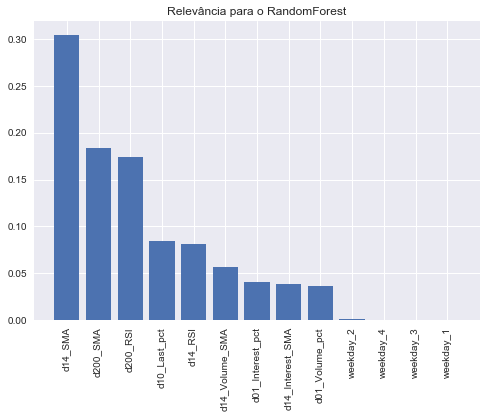

In [174]:
rfr=RandomForestRegressor(random_state=45, n_estimators=200, max_features= 10, max_depth= 3)


rfr.fit(train_features,train_targets)

importances=rfr.feature_importances_
print(rfr.score(train_features,train_targets))

#index of greatest to least features importance

sorted_index=np.argsort(importances)[::-1]
x=range(len(importances))
labels=np.array(feature_names)[sorted_index]

plt.bar(x, importances[sorted_index], tick_label=labels)
plt.title("Relevância para o RandomForest")
plt.xticks(rotation=90)
plt.show()


# Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingRegressor


C:\Users\Mesz\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [233]:
#Creating GB model

gbr= GradientBoostingRegressor(max_features=10, learning_rate=0.01, 
                               n_estimators=200,subsample=0.6, random_state=45)

In [235]:
gbr.fit(train_features,train_targets)
print(gbr.score(train_features,train_targets))
print(gbr.score(test_features,test_targets))

0.2931870957359014
-0.029549440537381507


In [90]:
gbr= GradientBoostingRegressor()
grid_b={'n_estimators':np.arange(199,201, dtype=int),'max_features':np.arange(10,13,dtype=int),
        'random_state':np.arange(40,50, dtype=int), 'learning_rate':[0.01], 'subsample':np.arange(0.06,0.8,0.03)}
train_scores_b=[]
test_scores_b=[]

In [254]:
np.arange(0.06,0.8,0.03)

array([0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 , 0.33, 0.36,
       0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 , 0.63, 0.66, 0.69,
       0.72, 0.75, 0.78])

In [259]:
for g in ParameterGrid(grid_b):
    gbr.set_params(**g)  #is "unpacking the dictionary
    gbr.fit(train_features,train_targets)
    train_scores_b.append(gbr.score(train_features,train_targets))
    test_scores_b.append(gbr.score(test_features,test_targets))



    
best_idx_b=np.argmax(test_scores_b)
print(train_scores_b[best_idx_b], test_scores_b[best_idx_b], ParameterGrid(grid_b)[best_idx_b])
 
    


0.25326561519992896 0.011591366178915874 {'subsample': 0.18, 'random_state': 40, 'n_estimators': 199, 'max_features': 12, 'learning_rate': 0.01}


In [260]:
print("0.2034534547585629 0.008345592623603348 {'subsample': 0.06, 'random_state': 40, 'n_estimators': 200, 'max_features': 10, 'learning_rate': 0.01}")
print("0.2923408581372716 -0.019856049655030628 {'subsample': 0.6, 'random_state': 40, 'n_estimators': 199, 'max_features': 12, 'learning_rate': 0.01}")
print("0.25326561519992896 0.011591366178915874 {'subsample': 0.18, 'random_state': 40, 'n_estimators': 199, 'max_features': 12, 'learning_rate': 0.01}")

0.2034534547585629 0.008345592623603348 {'subsample': 0.06, 'random_state': 40, 'n_estimators': 200, 'max_features': 10, 'learning_rate': 0.01}
0.2923408581372716 -0.019856049655030628 {'subsample': 0.6, 'random_state': 40, 'n_estimators': 199, 'max_features': 12, 'learning_rate': 0.01}
0.25326561519992896 0.011591366178915874 {'subsample': 0.18, 'random_state': 40, 'n_estimators': 199, 'max_features': 12, 'learning_rate': 0.01}


In [92]:
#Creating GB model

gbr= GradientBoostingRegressor(max_features=12, learning_rate=0.01, 
                               n_estimators=199,subsample=0.18, random_state=40)



gbr.fit(train_features,train_targets)

importances_b=gbr.feature_importances_
print(gbr.score(train_features,train_targets))

#index of greatest to least features importance

sorted_index_b=np.argsort(importances_b)[::-1]
x=range(len(importances_b))
labels_b=np.array(feature_names)[sorted_index_b]

plt.bar(x, importances_b[sorted_index_b], tick_label=labels_b)
plt.title("Relevância para o GB")
plt.xticks(rotation=90)
plt.show()




0.2259639193800543


IndexError: index 19 is out of bounds for axis 0 with size 13

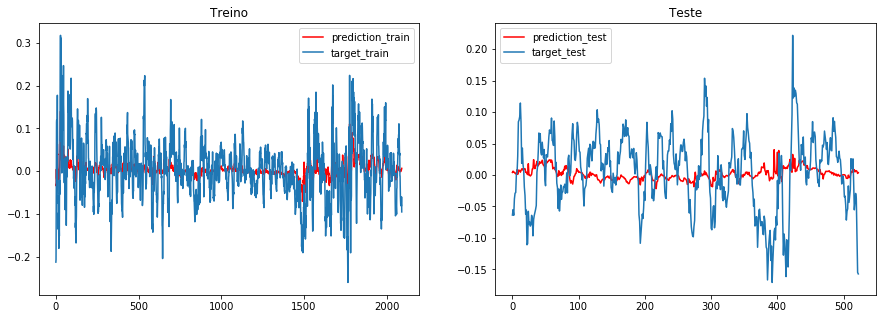

In [111]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))


ax1.plot (prediction_b_train,  color='r', label='prediction_train')
ax1.plot(train_targets, label='target_train')
ax1.legend()
ax1.set(title='Treino')


ax2.plot (prediction_b_test, color='r', label='prediction_test')
ax2.plot(test_targets, label='target_test')
ax2.legend()
ax2.set(title='Teste')
plt.show()

In [94]:
prediction_b_test=gbr.predict(test_features)
prediction_b_train=gbr.predict(train_features)

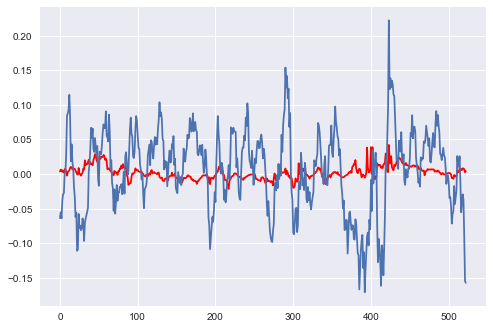

In [277]:
plt.plot (prediction_b_test, color='r')
plt.plot(test_targets)
plt.show()

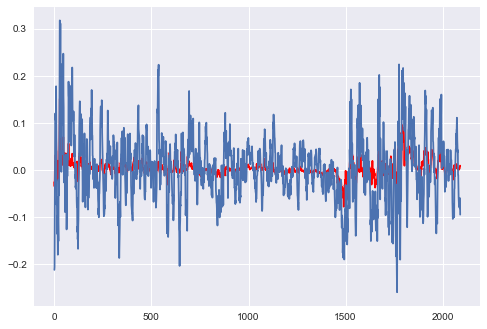

In [278]:
plt.plot (prediction_b_train, color='r')
plt.plot(train_targets)
plt.show()

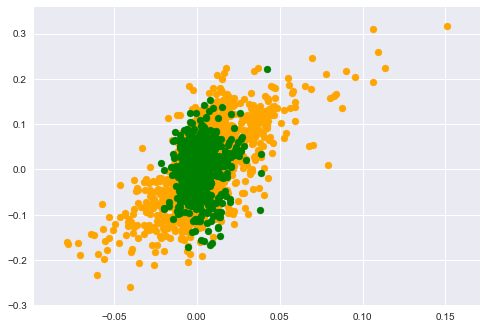

In [283]:
plt.scatter(prediction_b_train, train_targets, color='orange')
plt.scatter(prediction_b_test, test_targets, color='green')

plt.show()

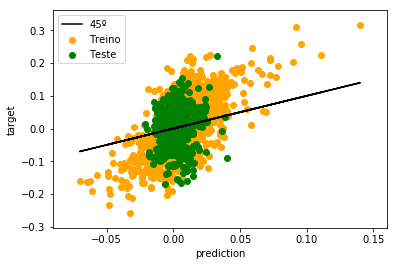

In [120]:
plt.scatter(prediction_b_train, train_targets, color='orange', label='Treino')
plt.scatter(prediction_b_test, test_targets, color='green', label='Teste')
plt.plot(prediction_b_train,prediction_b_train, color='black', label='45º')
plt.xlabel('prediction')
plt.ylabel('target')
plt.legend()

plt.show()